# Neural Network

In [ ]:
#import the required libraries
import numpy
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# The following code is used for hiding the warnings and make this notebook clearer.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Let define our activity function and its derivative (we use tanh(x) in this example):
def tanh(x):
    return (1.0 - numpy.exp(-2*x))/(1.0 + numpy.exp(-2*x))

def tanh_derivative(x):
    return (1 + x)*(1 - x)

In [ ]:
#Let define the NeuralNetwork class:
class NeuralNetwork:
    #########
    # parameters
    # ----------
    # self:      the class object itself
    # net_arch:  consists of a list of integers, indicating
    #            the number of neurons in each layer, i.e. the network architecture
    #########
    def __init__(self, net_arch):
        numpy.random.seed(0)

        # Initialized the weights, making sure we also
        # initialize the weights for the biases that we will add later
        self.activity = tanh
        self.activity_derivative = tanh_derivative
        self.layers = len(net_arch)
        self.steps_per_epoch = 1
        self.arch = net_arch
        self.weights = []

        # Random initialization with range of weight values (-1,1)
        for layer in range(self.layers - 1):
            w = 2*numpy.random.rand(net_arch[layer] + 1, net_arch[layer+1]) - 1
            self.weights.append(w)

    def _forward_prop(self, x):
        y = x

        for i in range(len(self.weights)-1):
            activation = numpy.dot(y[i], self.weights[i])
            activity = self.activity(activation)

            # add the bias for the next layer
            activity = numpy.concatenate((numpy.ones(1), numpy.array(activity)))
            y.append(activity)

        # last layer
        activation = numpy.dot(y[-1], self.weights[-1])
        activity = self.activity(activation)
        y.append(activity)

        return y

    def _back_prop(self, y, target, learning_rate):
        error = target - y[-1]
        delta_vec = [error * self.activity_derivative(y[-1])]

        # we need to begin from the back, from the next to last layer
        for i in range(self.layers-2, 0, -1):
            error = delta_vec[-1].dot(self.weights[i][1:].T)
            error = error*self.activity_derivative(y[i][1:])
            delta_vec.append(error)

        # Now we need to set the values from back to front
        delta_vec.reverse()

        # Finally, we adjust the weights, using the backpropagation rules
        for i in range(len(self.weights)):
            layer = y[i].reshape(1, self.arch[i]+1)
            delta = delta_vec[i].reshape(1, self.arch[i+1])
            self.weights[i] += learning_rate*layer.T.dot(delta)

    #########
    # parameters
    # ----------
    # self:    the class object itself
    # data:    the set of all possible pairs of booleans True or False indicated by the integers 1 or 0
    # labels:  the result of the logical operation 'xor' on each of those input pairs
    #########
    def fit(self, data, labels, learning_rate=0.1, epochs=100):

        # Add bias units to the input layer -
        # add a "1" to the input data (the always-on bias neuron)
        ones = numpy.ones((1, data.shape[0]))
        Z = numpy.concatenate((ones.T, data), axis=1)

        for k in range(epochs):
            if (k+1) % 10000 == 0:
                print('epochs: {}'.format(k+1))

            sample = numpy.random.randint(X.shape[0])

            # We will now go ahead and set up our feed-forward propagation:
            x = [Z[sample]]
            y = self._forward_prop(x)

            # Now we do our back-propagation of the error to adjust the weights:
            target = labels[sample]
            self._back_prop(y, target, learning_rate)

   #########
    # the predict function is used to check the prediction result of
    # this neural network.
    #
    # parameters
    # ----------
    # self:   the class object itself
    # x:      single input data
    #########
    def predict_single_data(self, x):
        val = numpy.concatenate((numpy.ones(1).T, numpy.array(x)))
        for i in range(0, len(self.weights)):
            val = self.activity(numpy.dot(val, self.weights[i]))
            val = numpy.concatenate((numpy.ones(1).T, numpy.array(val)))
        return val[1]

    #########
    # the predict function is used to check the prediction result of
    # this neural network.
    #
    # parameters
    # ----------
    # self:   the class object itself
    # X:      the input data array
    #########
    def predict(self, X):
        Y = numpy.array([]).reshape(0, self.arch[-1])
        for x in X:
            y = numpy.array([[self.predict_single_data(x)]])
            Y = numpy.vstack((Y,y))
        return Y

In [ ]:
numpy.random.seed(0)

# Initialize the NeuralNetwork with
# 2 input neurons
# 2 hidden neurons
# 1 output neuron
nn = NeuralNetwork([2,2,1])

# Set the input data
X = numpy.array([[0, 0], [0, 1],
                [1, 0], [1, 1]])

# Set the labels, the correct results for the xor operation
y = numpy.array([0, 1,
                 1, 0])

# Call the fit function and train the network for a chosen number of epochs
nn.fit(X, y, epochs=100000)

# Show the prediction results
print("Final prediction")
for s in X:
    print(s, nn.predict_single_data(s))


epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
epochs: 100000
Final prediction
[0 0] 2.7693903183372263e-05
[0 1] 0.995154295769496
[1 0] 0.9951532983339081
[1 1] 2.7834280538588892e-05


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


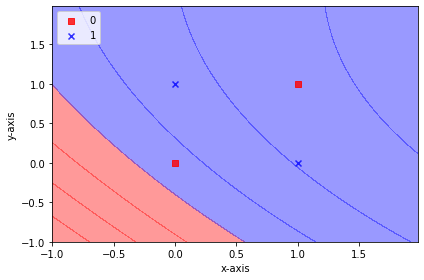

In [ ]:
numpy.random.seed(0)
nn = NeuralNetwork([2,2,1])
nn.fit(X, y, epochs=10)
plot_decision_regions(X, y, nn)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


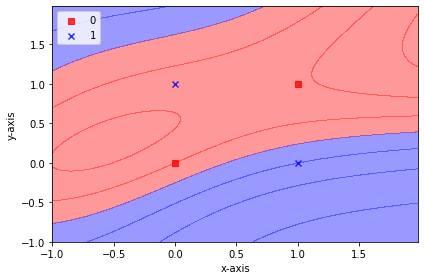

In [ ]:
numpy.random.seed(0)
nn = NeuralNetwork([2,4,3,1])
nn.fit(X, y, epochs=10)
plot_decision_regions(X, y, nn)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


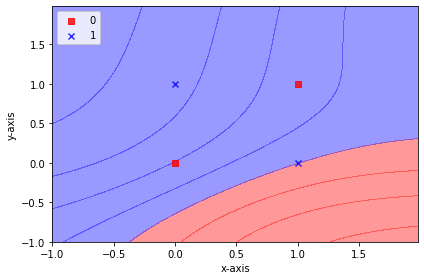

In [ ]:
numpy.random.seed(0)
nn = NeuralNetwork([2,4,1])
nn.fit(X, y, epochs=10)
plot_decision_regions(X, y, nn)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#Appendix
import numpy as np
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

# Keras for CIFAR-10

In [ ]:
from keras.datasets import cifar10
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)
input_size = 3072
batch_size = 100
epochs = 10


In [ ]:
model = Sequential([
 Dense(1024, input_dim=input_size),
 Activation('relu'),
 Dense(512),
 Activation('relu'),
 Dense(512),
 Activation('sigmoid'),
 Dense(classes),
 Activation('softmax')
])


In [ ]:
model.compile(loss='categorical_crossentropy',
metrics=['accuracy'], optimizer='sgd')
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
validation_data=(X_test, Y_test), verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 29s 583us/step - loss: 2.1702 - accuracy: 0.1835 - val_loss: 2.1039 - val_accuracy: 0.2087
Epoch 2/10
50000/50000 [==============================] - 29s 589us/step - loss: 2.0298 - accuracy: 0.2477 - val_loss: 1.9746 - val_accuracy: 0.2721
Epoch 3/10
50000/50000 [==============================] - 29s 582us/step - loss: 1.9606 - accuracy: 0.2844 - val_loss: 1.9274 - val_accuracy: 0.2939
Epoch 4/10
50000/50000 [==============================] - 29s 583us/step - loss: 1.9249 - accuracy: 0.2994 - val_loss: 1.8987 - val_accuracy: 0.3039
Epoch 5/10
50000/50000 [==============================] - 29s 586us/step - loss: 1.8918 - accuracy: 0.3094 - val_loss: 1.8916 - val_accuracy: 0.3077
Epoch 6/10
50000/50000 [==============================] - 29s 582us/step - loss: 1.8583 - accuracy: 0.3239 - val_loss: 1.8512 - val_accuracy: 0.3303
Epoch 7/10
50000/50000 [==============================] 

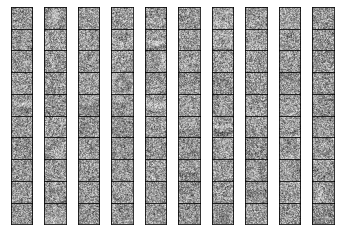

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import numpy
import random
fig = plt.figure()
outer_grid = gridspec.GridSpec(10, 10, wspace=0.0, hspace=0.0)
weights = model.layers[0].get_weights()
w = weights[0].T
for i, neuron in enumerate(random.sample(range(0, 1023), 100)):
 ax = plt.Subplot(fig, outer_grid[i])
 ax.imshow(numpy.mean(numpy.reshape(w[i], (32, 32, 3)), axis=2),
cmap=cm.Greys_r)
 ax.set_xticks([])
 ax.set_yticks([])
 fig.add_subplot(ax)
plt.show()


#A CNN example with Keras and CIFAR-10

In [ ]:
import keras
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
batch_size = 50

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)


In [ ]:
data_generator = ImageDataGenerator(rotation_range=90,
width_shift_range=0.1,
height_shift_range=0.1,
featurewise_center=True,
featurewise_std_normalization=True,
horizontal_flip=True)
data_generator.fit(X_train)
# standardize the test set
for i in range(len(X_test)):
 X_test[i] = data_generator.standardize(X_test[i])

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
metrics=['accuracy'])


In [ ]:
model.fit_generator(
generator=data_generator.flow(x=X_train,
y=Y_train,
batch_size=batch_size),
steps_per_epoch=len(X_train) // batch_size,
epochs=20,
validation_data=(X_test, Y_test),
workers=4)


Epoch 1/20
1000/1000 [==============================] - 430s 430ms/step - loss: 1.8566 - accuracy: 0.3434 - val_loss: 1.6106 - val_accuracy: 0.4145
Epoch 2/20
1000/1000 [==============================] - 438s 438ms/step - loss: 1.5431 - accuracy: 0.4430 - val_loss: 1.4613 - val_accuracy: 0.4975
Epoch 3/20
1000/1000 [==============================] - 436s 436ms/step - loss: 1.3805 - accuracy: 0.5059 - val_loss: 1.4137 - val_accuracy: 0.5196
Epoch 4/20
1000/1000 [==============================] - 430s 430ms/step - loss: 1.2987 - accuracy: 0.5358 - val_loss: 1.2856 - val_accuracy: 0.5628
Epoch 5/20
   6/1000 [..............................] - ETA: 6:39 - loss: 1.2738 - accuracy: 0.5400

KeyboardInterrupt: ignored

# A coding example of convolution operation

In [ ]:
def conv(image, im_filter):
 """
 :param image: grayscale image as a 2-dimensional numpy array
 :param im_filter: 2-dimensional numpy array
 """
 # input dimensions
 height = image.shape[0]
 width = image.shape[1]
 # output image with reduced dimensions
 im_c = np.zeros((height - len(im_filter) + 1,
 width - len(im_filter) + 1))
 # iterate over all rows and columns
 for row in range(len(im_c)):
     for col in range(len(im_c[0])):
 # apply the filter
       for i in range(len(im_filter)):
            for j in range(len(im_filter[0])):
                im_c[row, col] += image[row + i, col + j] *im_filter[i][j]
 # fix out-of-bounds values
 im_c[im_c > 255] = 255
 im_c[im_c < 0] = 0
 # plot images for comparison
 import matplotlib.pyplot as plt
 import matplotlib.cm as cm
 plt.figure()
 plt.imshow(image, cmap=cm.Greys_r)
 plt.show()
 plt.imshow(im_c, cmap=cm.Greys_r)
 plt.show()

In [ ]:
import numpy as np
import requests
from PIL import Image
from io import BytesIO
# load the image
url =""https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Commande
r_Eileen_Collins_-_GPN-2000-001177.jpg/382pxCommander_Eileen_Collins_-_GPN-2000-001177.jpg?download""
resp = requests.get(url)
image_rgb =np.asarray(Image.open(BytesIO(resp.content)).convert("RGB"))
# convert to grayscale
image_grayscale = np.mean(image_rgb, axis=2, dtype=np.uint)


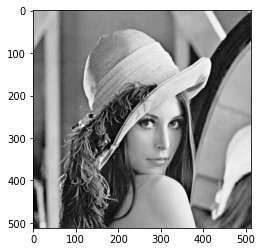

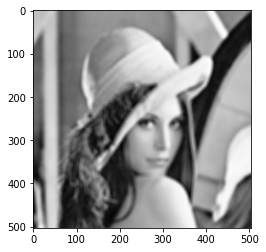

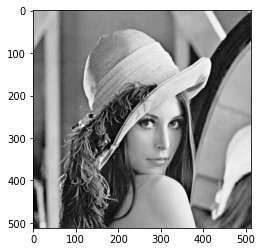

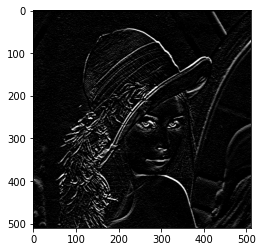

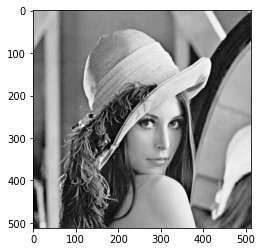

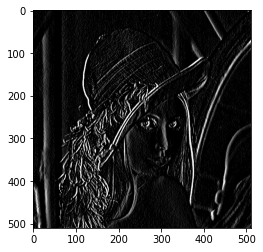

In [ ]:
# blur filter
blur = np.full([10, 10], 1. / 100)
conv(image_grayscale, blur)
# Sobel edge detectors
sobel_x = [[-1, -2, -1],
           [0, 0, 0],
 [1, 2, 1]]
conv(image_grayscale, sobel_x)
sobel_y = [[-1, 0, 1],
 [-2, 0, 2],
 [-1, 0, 1]]
conv(image_grayscale, sobel_y)

# Transfer learning example with PyTorch


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import models, transforms


In [ ]:
batch_size = 50

In [ ]:
# training data
train_data_transform = transforms.Compose([
 transforms.Resize(224),
 transforms.RandomHorizontalFlip(),
 transforms.RandomVerticalFlip(),
 transforms.ToTensor(),
 transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224,
0.225])
])
train_set = torchvision.datasets.CIFAR10(root='./data',
 train=True,
download=True,
transform=train_data_transform)
train_loader = torch.utils.data.DataLoader(train_set,
 batch_size=batch_size,
shuffle=True,
num_workers=2)


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
val_data_transform = transforms.Compose([
 transforms.Resize(224),
 transforms.ToTensor(),
 transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224,
0.225])
])
val_set = torchvision.datasets.CIFAR10(root='./data',
 train=False,
download=True,
transform=val_data_transform)
val_order = torch.utils.data.DataLoader(val_set,
 batch_size=batch_size,
shuffle=False,
num_workers=2)

Files already downloaded and verified


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else
"cpu")


In [ ]:
def train_model(model, loss_function, optimizer, data_loader):
 # set model to training mode
 model.train()
 current_loss = 0.0
 current_acc = 0
 # iterate over the training data
 for i, (inputs, labels) in enumerate(data_loader):
    # send the input/labels to the GPU
    inputs = inputs.to(device)
    labels = labels.to(device)
 # zero the parameter gradients
 optimizer.zero_grad()
 with torch.set_grad_enabled(True):
 # forward
    outputs = model(inputs)
 _, predictions = torch.max(outputs, 1)
 loss = loss_function(outputs, labels)
 # backward
 loss.backward()
 optimizer.step()
 # statistics
 current_loss += loss.item() * inputs.size(0)
 current_acc += torch.sum(predictions == labels.data)
 total_loss = current_loss / len(data_loader.dataset)
 total_acc = current_acc.double() / len(data_loader.dataset)
 print('Train Loss: {:.4f}; Accuracy: {:.4f}'.format(total_loss,
total_acc))

In [ ]:
def test_model(model, loss_function, data_loader):
 # set model in evaluation mode
 model.eval()
 current_loss = 0.0
 current_acc = 0
 # iterate over the validation data
 for i, (inputs, labels) in enumerate(data_loader):
 # send the input/labels to the GPU
      inputs = inputs.to(device)
 labels = labels.to(device)
 # forward
 with torch.set_grad_enabled(False):
      outputs = model(inputs)
 _, predictions = torch.max(outputs, 1)
 loss = loss_function(outputs, labels)
 # statistics
 current_loss += loss.item() * inputs.size(0)
 current_acc += torch.sum(predictions == labels.data)
 total_loss = current_loss / len(data_loader.dataset)
 total_acc = current_acc.double() / len(data_loader.dataset)
 print('Test Loss: {:.4f}; Accuracy: {:.4f}'.format(total_loss,
total_acc))

In [ ]:
def tl_feature_extractor(epochs=3):
 # load the pre-trained model
 model = torchvision.models.resnet18(pretrained=True)
 # exclude existing parameters from backward pass
 # for performance
 for param in model.parameters():
  param.requires_grad = False
 # newly constructed layers have requires_grad=True by default
 num_features = model.fc.in_features
 model.fc = nn.Linear(num_features, 10)
 # transfer to GPU (if available)
 model = model.to(device)
 loss_function = nn.CrossEntropyLoss()
 # only parameters of the final layer are being optimized
 optimizer = optim.Adam(model.fc.parameters())
 # train
 for epoch in range(epochs):
  print('Epoch {}/{}'.format(epoch + 1, epochs))
 train_model(model, loss_function, optimizer, train_loader)
 test_model(model, loss_function, val_order)


In [ ]:

def tl_fine_tuning(epochs=3):
 # load the pre-trained model
 model = models.resnet18(pretrained=True)
 # replace the last layer
 num_features = model.fc.in_features
 model.fc = nn.Linear(num_features, 10)
 # transfer the model to the GPU
 model = model.to(device)
 # loss function
 loss_function = nn.CrossEntropyLoss()
 # We'll optimize all parameters
 optimizer = optim.Adam(model.parameters())
 # train
 for epoch in range(epochs):
  print('Epoch {}/{}'.format(epoch + 1, epochs))
 train_model(model, loss_function, optimizer, train_loader)
 test_model(model, loss_function, val_order)


In [ ]:
tl_fine_tuning(epochs=5)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth



Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Train Loss: 0.0024; Accuracy: 0.0002
Test Loss: 0.0125; Accuracy: 0.0005


In [ ]:
tl_feature_extractor(epochs=10)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Train Loss: 0.0025; Accuracy: 0.0001
Test Loss: 0.0112; Accuracy: 0.0009


# Advanced network architectures

**VGG**

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# load an image from file
image = load_img('/mug.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

coffee_mug (75.90%)


ResNet

In [ ]:
# function for creating an identity residual module
def residual_module(layer_in, n_filters):
	# conv1
	conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
	# conv2
	conv2 = Conv2D(n_filters, (3,3), padding='same', activation='linear', kernel_initializer='he_normal')(conv1)
	# add filters, assumes filters/channels last
	layer_out = add([conv2, layer_in])
	# activation function
	layer_out = Activation('relu')(layer_out)
	return layer_out

In [ ]:
# function for creating an identity or projection residual module
def residual_module(layer_in, n_filters):
	merge_input = layer_in
	# check if the number of filters needs to be increase, assumes channels last format
	if layer_in.shape[-1] != n_filters:
		merge_input = Conv2D(n_filters, (1,1), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
	# conv1
	conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
	# conv2
	conv2 = Conv2D(n_filters, (3,3), padding='same', activation='linear', kernel_initializer='he_normal')(conv1)
	# add filters, assumes filters/channels last
	layer_out = add([conv2, merge_input])
	# activation function
	layer_out = Activation('relu')(layer_out)
	return layer_out

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 64) 1792        input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 256, 256, 64) 36928       conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 256         input_5[0][0]                    
____________________________________________________________________________________________

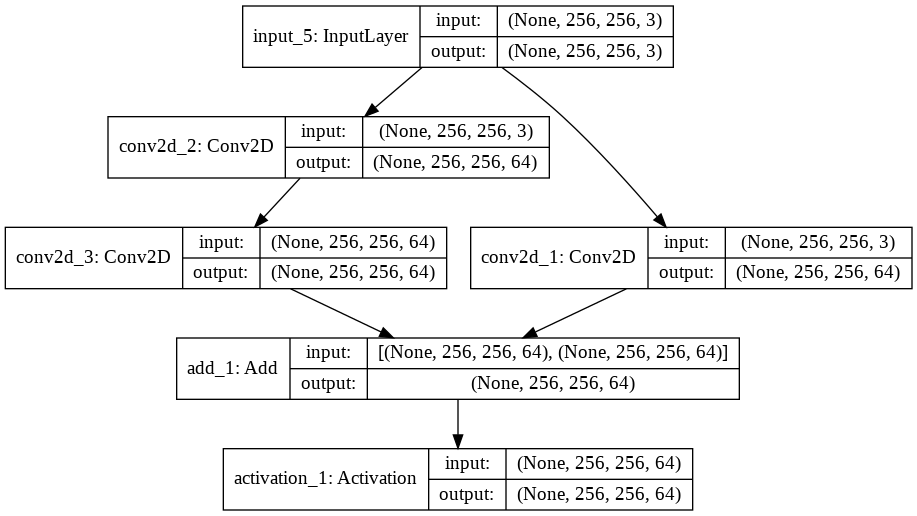

In [ ]:
# example of a CNN model with an identity or projection residual module
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import add
from keras.utils import plot_model

# function for creating an identity or projection residual module
def residual_module(layer_in, n_filters):
	merge_input = layer_in
	# check if the number of filters needs to be increase, assumes channels last format
	if layer_in.shape[-1] != n_filters:
		merge_input = Conv2D(n_filters, (1,1), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
	# conv1
	conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
	# conv2
	conv2 = Conv2D(n_filters, (3,3), padding='same', activation='linear', kernel_initializer='he_normal')(conv1)
	# add filters, assumes filters/channels last
	layer_out = add([conv2, merge_input])
	# activation function
	layer_out = Activation('relu')(layer_out)
	return layer_out

# define model input
visible = Input(shape=(256, 256, 3))
# add vgg module
layer = residual_module(visible, 64)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file='residual_module.png')

**Inception**

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 256, 256, 64) 256         input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 256, 256, 128 3584        input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 256, 256, 32) 2432        input_9[0][0]                    
____________________________________________________________________________________________

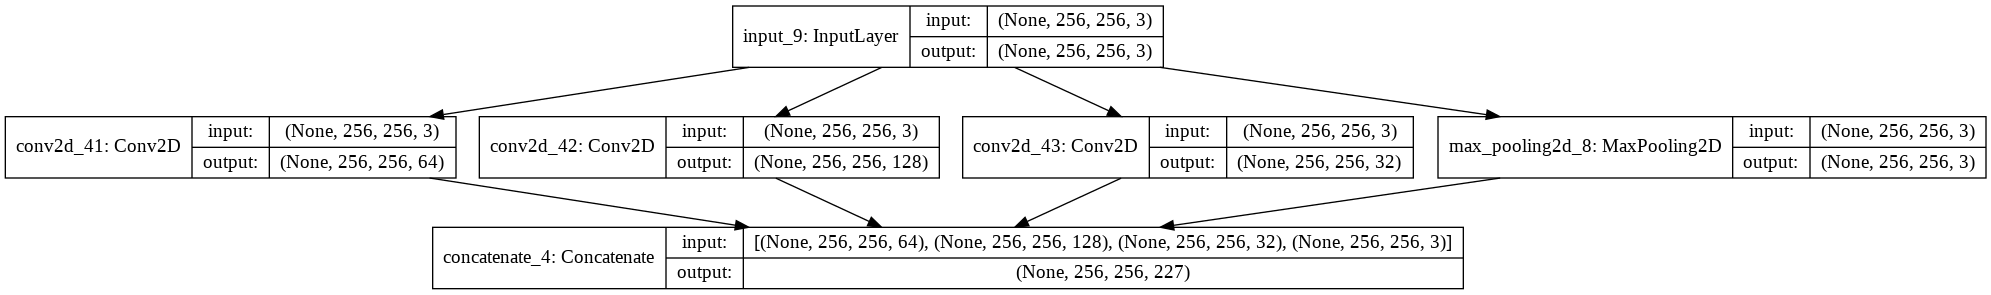

In [ ]:
# example of creating a CNN with an inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.merge import concatenate
from keras.utils import plot_model

# function for creating a naive inception block
def naive_inception_module(layer_in, f1, f2, f3):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
	# 5x5 conv
	conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	# concatenate filters, assumes filters/channels last
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out

# define model input
visible = Input(shape=(256, 256, 3))
# add inception module
layer = naive_inception_module(visible, 64, 128, 32)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file='naive_inception_module.png')

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 256, 256, 96) 384         input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 256, 256, 16) 64          input_8[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 256, 256, 3)  0           input_8[0][0]                    
____________________________________________________________________________________________

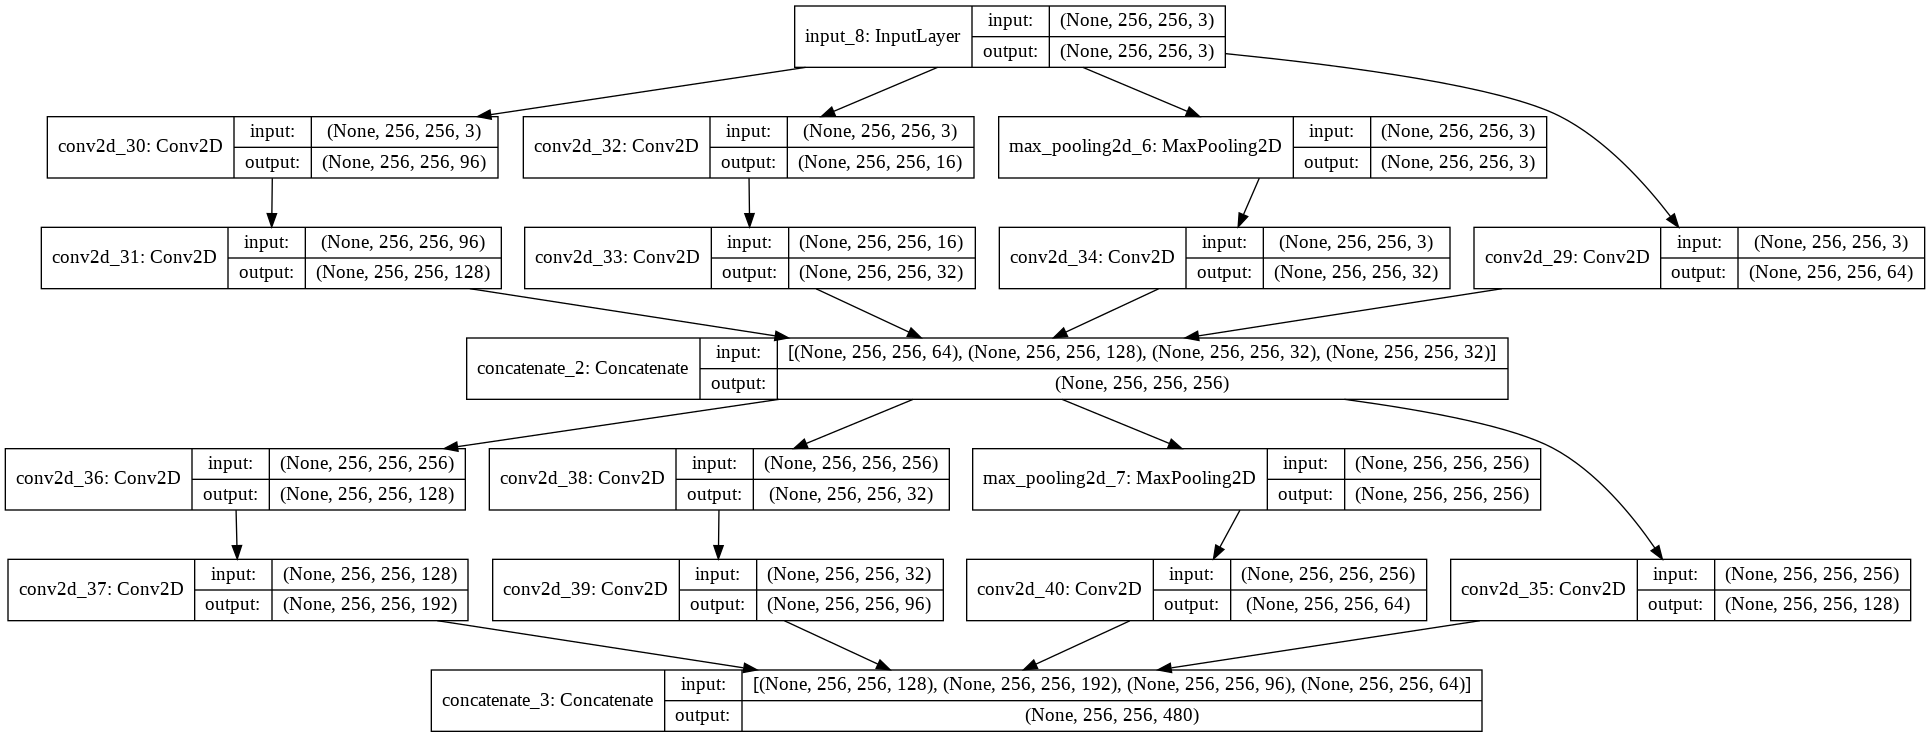

In [ ]:
# example of creating a CNN with an efficient inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.merge import concatenate
from keras.utils import plot_model

# function for creating a projected inception module
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
	conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
	# 5x5 conv
	conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
	conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
	# concatenate filters, assumes filters/channels last
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out

# define model input
visible = Input(shape=(256, 256, 3))
# add inception block 1
layer = inception_module(visible, 64, 96, 128, 16, 32, 32)
# add inception block 1
layer = inception_module(layer, 128, 128, 192, 32, 96, 64)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file='inception_module.png')

In [ ]:
# function for creating a projected inception module
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
	conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
	# 5x5 conv
	conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
	conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
	# concatenate filters, assumes filters/channels last
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out

# CapsNet

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense
# define variables
input_num_units = 784
hidden_num_units = 50
output_num_units = 10

epochs = 15
batch_size = 128

# create model
model = Sequential([
 Dense(units=hidden_num_units, input_dim=input_num_units, activation='relu'),
 Dense(units=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

# compile the model with necessary attributes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit( batch_size=batch_size, epochs=epochs)

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
import keras
import sys
print("python {}".format(sys.version))
print("keras version {}".format(keras.__version__))
print("tensorflow version {}".format(tf.__version__))
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.95
config.gpu_options.visible_device_list = "0"
#### 2 GPU1
#### 0 GPU3
#### 4 GPU4
#### 3 GPU2
set_session(tf.Session(config=config))

In [ ]:
!python2 --version

Python 2.7.17


In [ ]:
!python3 --version

Python 3.6.9


#VAE

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import numpy as np
from keras import backend as K
from keras.datasets import mnist
from keras.layers import Lambda, Input, Dense
from keras.losses import binary_crossentropy
from keras.models import Model


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
image_size = x_train.shape[1] * x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size])
x_test = np.reshape(x_test, [-1, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [ ]:
def build_vae(intermediate_dim=512, latent_dim=2):
 """
 Build VAE
 :param intermediate_dim: size of hidden layers of the
encoder/decoder
 :param latent_dim: latent space size
 :returns tuple: the encoder, the decoder, and the full vae
 """
 # encoder first
 inputs = Input(shape=(image_size,), name='encoder_input')
 x = Dense(intermediate_dim, activation='relu')(inputs)
 # latent mean and variance
 z_mean = Dense(latent_dim, name='z_mean')(x)
 z_log_var = Dense(latent_dim, name='z_log_var')(x)
 # reparameterization trick for random sampling
 # Note the use of the Lambda layer
 # At runtime, it will call the sampling function
 z = Lambda(sampling, output_shape=(latent_dim,),
name='z')([z_mean, z_log_var])
 # full encoder encoder model
 encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
 encoder.summary()


In [ ]:
# decoder
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(image_size, activation='sigmoid')(x)
 # full decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
 # VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')
 # Loss function
 # we start with the reconstruction loss
reconstruction_loss = binary_crossentropy(inputs,outputs) *
image_size
 # next is the KL divergence
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
 # we combine them in a total loss
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
return encoder, decoder, vae


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [ ]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 14, 14, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 7, 7, 64)     18496       conv2d[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 3136)         0           conv2d_1[0][0]                   
____________________________________________________________________________________________

In [ ]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         289       
Total params: 65,089
Trainable params: 65,089
Non-trainable params: 0
_______________________________________________________

In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = encoder(data)
            reconstruction = decoder(z)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            reconstruction_loss *= 28 * 28
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(kl_loss)
            kl_loss *= -0.5
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

In [ ]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=10, batch_size=128)

Epoch 1/10
547/547 [==============================] - 101s 184ms/step - loss: 158.9800 - reconstruction_loss: 154.8740 - kl_loss: 4.1061
Epoch 2/10
547/547 [==============================] - 101s 184ms/step - loss: 157.0487 - reconstruction_loss: 152.9460 - kl_loss: 4.1027
Epoch 3/10
547/547 [==============================] - 100s 183ms/step - loss: 155.7408 - reconstruction_loss: 151.6308 - kl_loss: 4.1100
Epoch 4/10
547/547 [==============================] - 100s 183ms/step - loss: 154.8516 - reconstruction_loss: 150.7375 - kl_loss: 4.1141
Epoch 5/10
547/547 [==============================] - 101s 184ms/step - loss: 153.9663 - reconstruction_loss: 149.8600 - kl_loss: 4.1063
Epoch 6/10
547/547 [==============================] - 100s 183ms/step - loss: 153.3227 - reconstruction_loss: 149.2298 - kl_loss: 4.0929
Epoch 7/10
547/547 [==============================] - 100s 182ms/step - loss: 152.6161 - reconstruction_loss: 148.5179 - kl_loss: 4.0983
Epoch 8/10
547/547 [=====================

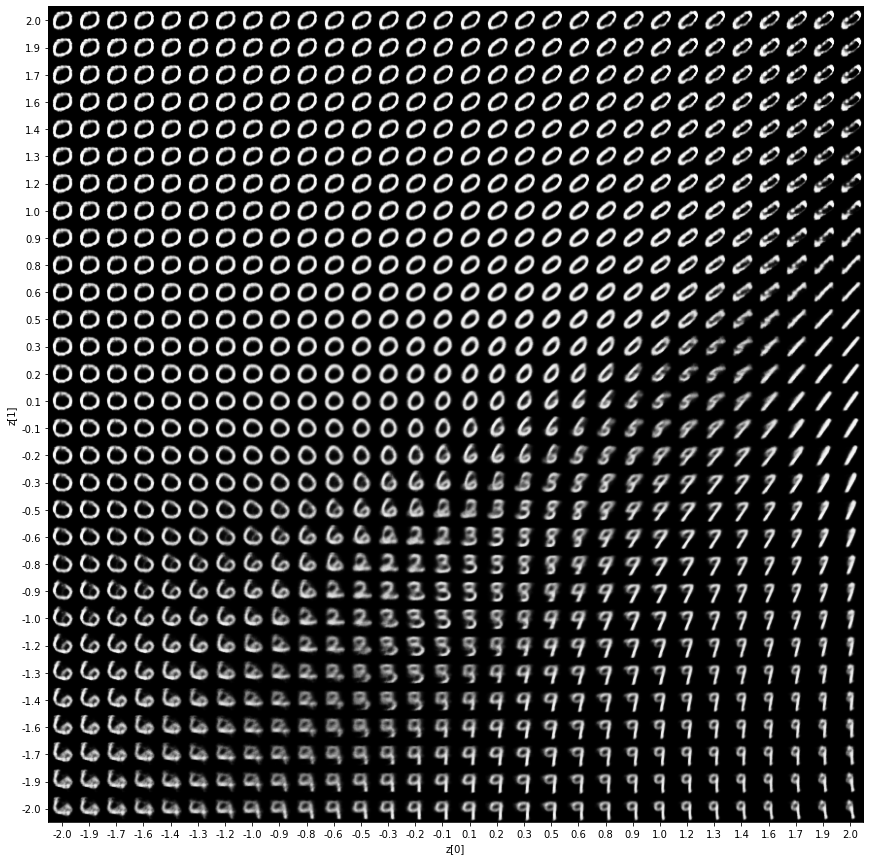

In [ ]:
import matplotlib.pyplot as plt


def plot_latent(encoder, decoder):
    # display a n*n 2D manifold of digits
    n = 30
    digit_size = 28
    scale = 2.0
    figsize = 15
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent(encoder, decoder)

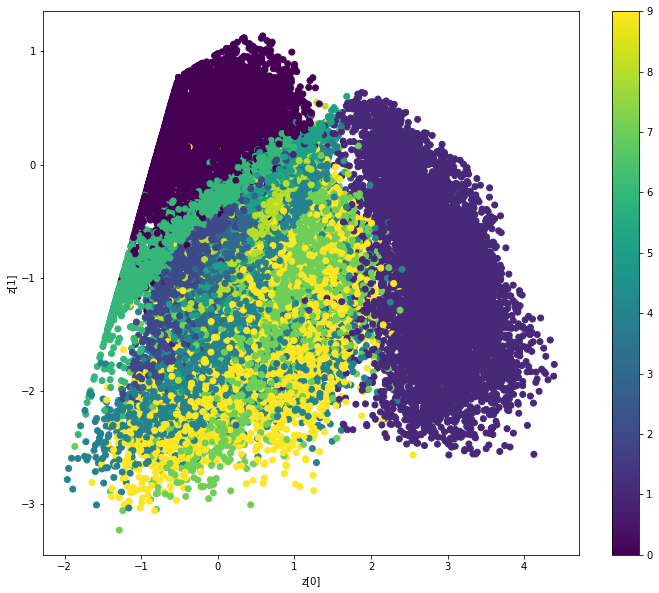

In [ ]:
def plot_label_clusters(encoder, decoder, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(encoder, decoder, x_train, y_train)

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


In [ ]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [ ]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [ ]:
print x_train.shape
print x_test.shape

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

RuntimeError: ignored

In [ ]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

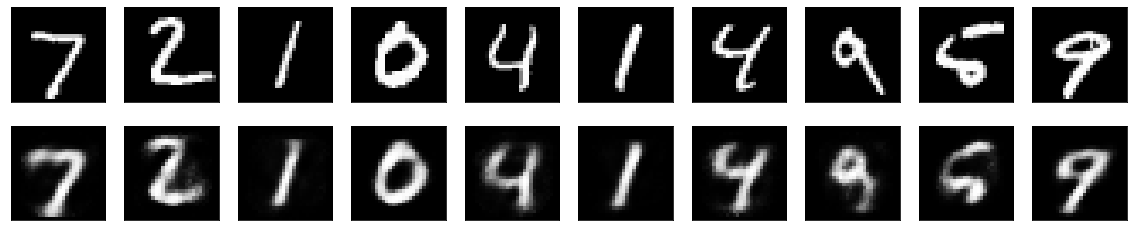

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Adding a sparsity constraint on the encoded representations**

In [ ]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2508 - val_loss: 0.1775
Epoch 2/100
60000/60000 [==============================] - 76s 1ms/step - loss: 0.1684 - val_loss: 0.1534
Epoch 3/100
27648/60000 [============>.................] - ETA: 39s - loss: 0.1564

KeyboardInterrupt: ignored

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2077 - val_loss: 0.1612
Epoch 2/15
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1533 - val_loss: 0.1491
Epoch 3/15
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1393 - val_loss: 0.1316
Epoch 4/15
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1317 - val_loss: 0.1272
Epoch 5/15
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1265 - val_loss: 0.1241
Epoch 6/15
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1235 - val_loss: 0.1206
Epoch 7/15
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1207 - val_loss: 0.1206
Epoch 8/15
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1181 - val_loss: 0.1167
Epoch 9/15
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1165 - val_loss: 0.1153
Epoch

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

NameError: ignored

In [ ]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

NameError: ignored

# GAN

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import BatchNormalization, Input, Dense, Reshape,Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam


In [ ]:
def build_generator(latent_dim: int):
    """
    Build discriminator network
    :param latent_dim: latent vector size
    """
    model = Sequential([
    Dense(128, input_dim=latent_dim),
    LeakyReLU(alpha=0.2),
    BatchNormalization(momentum=0.8),
    Dense(256),
    LeakyReLU(alpha=0.2),
    BatchNormalization(momentum=0.8),
    Dense(512),
    LeakyReLU(alpha=0.2),
    BatchNormalization(momentum=0.8),
    Dense(np.prod((28, 28, 1)), activation='tanh'),
    # reshape to MNIST image size
    Reshape((28, 28, 1))
    ])
    model.summary()
    # the latent input vector z
    z = Input(shape=(latent_dim,))
    generated = model(z)
  # build model from the input and output
    return Model(z, generated)


In [ ]:
def build_discriminator():
    """
    Build discriminator network
    """
    model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(256),
    LeakyReLU(alpha=0.2),
    Dense(128),
    LeakyReLU(alpha=0.2),
    Dense(1, activation='sigmoid'),
    ], name='discriminator')
    model.summary()
    image = Input(shape=(28, 28, 1))
    output = model(image)
    return Model(image, output)

In [ ]:
def train(generator, discriminator, combined, steps, batch_size):
    """
    Train the GAN system
    :param generator: generator
    :param discriminator: discriminator
    :param combined: stacked generator and discriminator
    we'll use the combined network when we train the generator
    :param steps: number of alternating steps for training
    :param batch_size: size of the minibatch
    """
    # Load the dataset
    (x_train, _), _ = mnist.load_data()
    # Rescale in [-1, 1] interval
    x_train = (x_train.astype(np.float32) - 127.5) / 127.5
    x_train = np.expand_dims(x_train, axis=-1)
    # Discriminator ground truths
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    latent_dim = generator.input_shape[1]
for step in range(steps):
    # Train the discriminator
    # Select a random batch of images
    real_images = x_train[np.random.randint(0,x_train.shape[0], batch_size)]
    # Random batch of noise
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    # Generate a batch of new images
    generated_images = generator.predict(noise)
    # Train the discriminator
    discriminator_real_loss =discriminator.train_on_batch(real_images, real)
    discriminator_fake_loss =discriminator.train_on_batch(generated_images, fake)
    discriminator_loss = 0.5 * np.add(discriminator_real_loss,discriminator_fake_loss)
    # Train the generator
    # random latent vector z
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    # Train the generator
    # Note that we use the "valid" labels for the generatedimages
    # That's because we try to maximize the discriminator loss
    generator_loss = combined.train_on_batch(noise, real)
    # Display progress
print("% d [Discriminator loss: %.4f%%, acc.: %.2f%%][Generator loss: %.4f%%]" %(step, discriminator_loss[0], 100 *discriminator_loss[1], generator_loss))


In [ ]:
def plot_generated_images(generator):
    """
    Display a nxn 2D manifold of digits
    :param generator: the generator
    """
    n = 10
    digit_size = 28
    # big array containing all images
    figure = np.zeros((digit_size * n, digit_size * n))
    latent_dim = generator.input_shape[1]
    # n*n random latent distributions
    noise = np.random.normal(0, 1, (n * n, latent_dim))
    # generate the images
    generated_images = generator.predict(noise)
    # fill the big array with images
for i in range(n):
  for j in range(n):
      slice_i = slice(i * digit_size, (i + 1) * digit_size)
      slice_j = slice(j * digit_size, (j + 1) * digit_size)
      figure[slice_i, slice_j] =np.reshape(generated_images[i * n + j], (28, 28))
    # plot the results
plt.figure(figsize=(6, 5))
plt.axis('off')
plt.imshow(figure, cmap='Greys_r')
plt.show()